# Import Statements

In [1]:
from numpy.random import seed
seed(888)
import tensorflow as tf
tf.random.set_seed(404)

In [102]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix

from time import strftime
import itertools

from IPython.display import display
from tensorflow.keras.utils import array_to_img

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [3]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
TOTAL_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
NR_CHANNELS = 3
TOTAL_INPUTS = TOTAL_PIXELS * NR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Gather Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(x_train_all)

numpy.ndarray

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# Exploratory Data Analysis

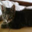

In [7]:
pic = array_to_img(x_train_all[9])
display(pic)

In [8]:
img_type = LABEL_NAMES[y_train_all[9][0]]
img_type

'Cat'

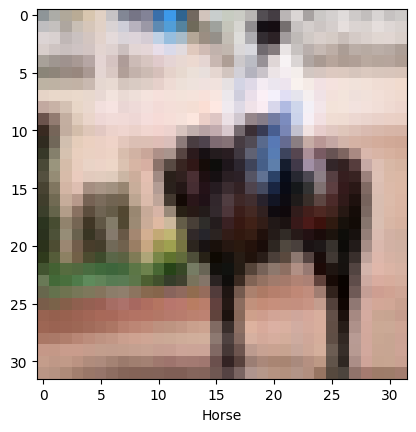

In [9]:
plt.imshow(x_train_all[11])
plt.xlabel(LABEL_NAMES[y_train_all[11][0]])
plt.show()

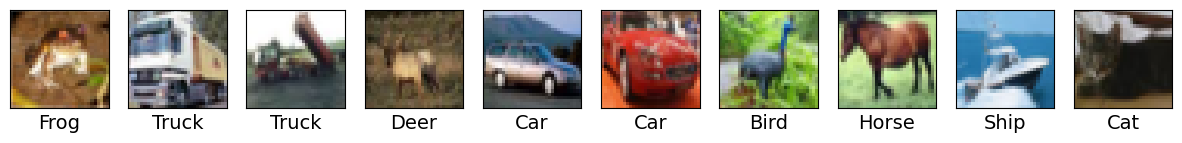

In [10]:
plt.figure(figsize=[15,5], dpi=100)
for x in range(10):
    plt.subplot(1, 10, x+1)
    plt.imshow(x_train_all[x])
    plt.xlabel(LABEL_NAMES[y_train_all[x][0]], fontsize=14)
    #plt.tick_params(left=False, bottom=False)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [11]:
x_train_all.shape

(50000, 32, 32, 3)

In [12]:
nr_images, x, y, z = x_train_all.shape
print(f"Images = {nr_images} | width = {x} | height = {y} | channels = {z}")

Images = 50000 | width = 32 | height = 32 | channels = 3


# Data Preprocessing

In [13]:
type(x_train_all[0][0][0][0]) 
# unint8 => is an unsigned integer (i.e an integer with no sign attached to it e.g 1984 but -2000
# is a signed integer)

numpy.uint8

In [14]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [15]:
type(x_train_all[0][0][0][0])

numpy.float64

In [16]:
x_train_all = x_train_all.reshape(len(x_train_all), TOTAL_INPUTS)

In [17]:
x_train_all.shape

(50000, 3072)

In [18]:
%%time
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)

CPU times: total: 750 ms
Wall time: 4.35 s


In [19]:
x_test.shape

(10000, 3072)

### Creating Validation Dataset

In [20]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [21]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a Smaller Training Dataset

In [22]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Net using Keras

In [57]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [58]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(units=128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(units=64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(units=16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(units=10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [59]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(units=128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(units=64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(units=16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(units=10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [24]:
type(model_1)

keras.engine.sequential.Sequential

In [25]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [26]:
# lets understand how we come about the total params
# prev_unit_of_prev_layer * current_unit + bias
(32*32*3*128+128) + (128*64+64) + (64*16+16) + (16*10+10)

402810

# Visualizing Learning with Tensorboard

In [27]:
def get_tensorboard(model_name):
    folder_name = f"{model_name} on {strftime('%d')}-{strftime('%b')}-{strftime('%y')} at {strftime('%H')}_{strftime('%M')}"
    dir_paths = os.path.join(LOG_DIR, folder_name)
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)


# Fit the Model

In [36]:
samples_per_batch = 1000

In [52]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch,
#             epochs=nr_epochs, callbacks=[get_tensorboard('Model 1')],
#             verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 6min 47s
Wall time: 2min 44s


In [60]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs, callbacks=[get_tensorboard('Model 1 XL')],
            verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 26min 19s
Wall time: 23min 30s


In [61]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs, callbacks=[get_tensorboard('Model 2 XL')],
            verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 37min 45s
Wall time: 17min 45s


In [62]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs, callbacks=[get_tensorboard('Model 3 XL')],
            verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 37min 3s
Wall time: 15min 46s


In [55]:
# %%time
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch,
#             epochs=nr_epochs, callbacks=[get_tensorboard('Model 2')],
#             verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 6min 50s
Wall time: 2min 56s


In [56]:
# %%time
# nr_epochs = 150
# model_3.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch,
#             epochs=nr_epochs, callbacks=[get_tensorboard('Model 3')],
#             verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 7min 58s
Wall time: 3min 14s


# Predictions on Individual Images

In [63]:
x_val.shape

(10000, 3072)

In [64]:
x_val[0].shape

(3072,)

In [67]:
test = np.expand_dims(x_val[0], axis=0)

In [68]:
test.shape

(1, 3072)

In [70]:
np.set_printoptions(precision=3)

In [73]:
prediction = model_2.predict(test)

1/1 [==============================] - 0s 301ms/step


In [81]:
predict_classes = np.argmax(prediction, axis=1)
predict_classes

array([6], dtype=int64)

In [79]:
y_val[0]

6

In [84]:
for x in range(10):
    test = np.expand_dims(x_val[x], axis=0)
    np.set_printoptions(precision=3)
    prediction = model_2.predict(test)
    predict_class = np.argmax(prediction, axis=1)
    actual_class = y_val[x]
    print(f"Actual class of item {x} is {LABEL_NAMES[actual_class[0]]} | Predicted class of item {x} is {LABEL_NAMES[predict_class[0]]}")

1/1 [==============================] - 0s 135ms/step
Actual class of item 0 is Frog | Predicted class of item 0 is Frog
1/1 [==============================] - 0s 108ms/step
Actual class of item 1 is Truck | Predicted class of item 1 is Car
1/1 [==============================] - 0s 132ms/step
Actual class of item 2 is Truck | Predicted class of item 2 is Truck
1/1 [==============================] - 0s 98ms/step
Actual class of item 3 is Deer | Predicted class of item 3 is Frog
1/1 [==============================] - 0s 107ms/step
Actual class of item 4 is Car | Predicted class of item 4 is Car
1/1 [==============================] - 0s 118ms/step
Actual class of item 5 is Car | Predicted class of item 5 is Horse
1/1 [==============================] - 0s 123ms/step
Actual class of item 6 is Bird | Predicted class of item 6 is Bird
1/1 [==============================] - 0s 109ms/step
Actual class of item 7 is Horse | Predicted class of item 7 is Horse
1/1 [==============================] - 

# Model Evaluation

In [86]:
model_2.metrics_names

['loss', 'accuracy']

In [87]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'The test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 6s 13ms/step - loss: 1.4331 - accuracy: 0.4918
The test loss is 1.43 and test accuracy is 49.2%


## Confusion Matrix

In [91]:
pred = model_2.predict(x_test)
predictions = np.argmax(pred, axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

313/313 [==============================] - 3s 9ms/step


In [93]:
conf_matrix.shape

(10, 10)

In [94]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [109]:
conf_matrix.max()

685

In [97]:
conf_matrix.min()

5

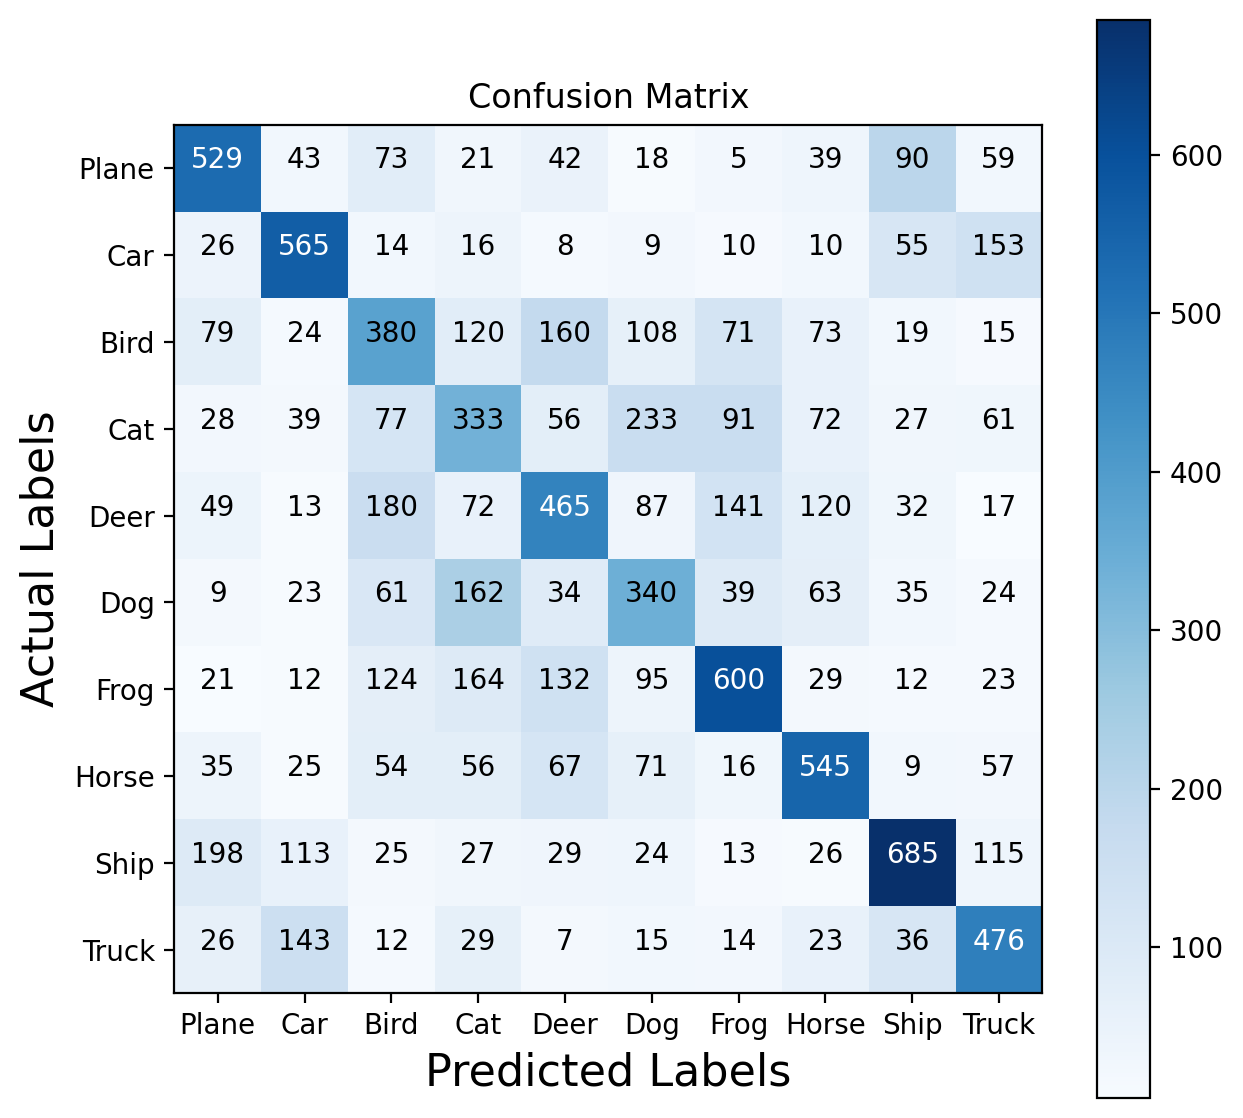

In [107]:
plt.figure(figsize=(7,7), dpi=200)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.ylabel('Actual Labels', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=16)

nr = np.arange(10)
plt.yticks(nr, LABEL_NAMES)
plt.xticks(nr, LABEL_NAMES)
plt.colorbar()
for i, j in itertools.product(range(10), range(10)):
    plt.text(i, j, conf_matrix[i, j], horizontalalignment='center',
             color='white' if conf_matrix[i, j] > 450 else 'black')

plt.show()

In [110]:
np.diag(conf_matrix)

array([529, 565, 380, 333, 465, 340, 600, 545, 685, 476], dtype=int64)

In [117]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.529, 0.565, 0.38 , 0.333, 0.465, 0.34 , 0.6  , 0.545, 0.685,
       0.476])

In [112]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.576, 0.652, 0.362, 0.327, 0.395, 0.43 , 0.495, 0.583, 0.546,
       0.609])

In [114]:
np.sum(conf_matrix, axis=0)

array([ 919,  866, 1049, 1017, 1176,  790, 1212,  935, 1255,  781],
      dtype=int64)

In [120]:
avg_recall = np.mean(recall)
print(f"Recall score of Model 2 is {avg_recall:.2%}")

Recall score of Model 2 is 49.18%


In [122]:
avg_precision = np.mean(precision)
print(f"Precision score of Model 2 is {avg_precision:.2%}")

Precision score of Model 2 is 49.77%


In [123]:
f1_score = 2 * ((avg_precision * avg_recall) / (avg_precision + avg_recall))
print(f"F score of Model 2 is {f1_score}")

F score of Model 2 is 0.49472010273882305
